#Load this dataset 



https://raw.githubusercontent.com/training-ml/Files/main/breast%20cancer.csv

Still, we are in a confusion about which feature selection method we have to use. But there is a problem. If we have 1000 features, now you can think how we can plot a heatmap for all features. It is unimaginable. It can happen, but it's too time-consuming. So, we are getting into a difficult condition in the real-time project. In that case, how can we select which feature is best for me?"




So here we are implementing a new technique called PCA — Principal Component Analysis.

Q: How can we import PCA?


Ans: We can import PCA from sklearn.decomposition.


In [ ]:
from sklearn.decomposition import PCA

Que:  What does decomposition mean? What is PCA actually? Is it a replacement for feature selection, or is it a feature selection technique, or is it a feature selection technique? What is it?


Ans: PCA is not a feature selection technique, although it may seem like one. Instead, it is a dimension reduction technique. I'll explain with an example.

    - PCA can only be applied on features.
    - It's useful when you have too many features, and their correlation with the target is not significant.
    - PCA also addresses the multicollinearity problem.
    - Before applying PCA, we need to standardize the features."

Que- How PCA work and intution behind the PCA.

Ans- Let's say I have one feature, x, where x = x1, x2, with x1 being one data point and x2 being another data point. Now, having one feature means it's only one-dimensional. x1 and x2 are the data points within this feature. So, if I want to calculate the distance between x1 and x2, how can I represent it graphically?

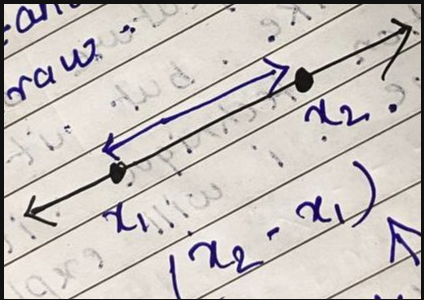

If you do this, you will notice the difference: only one calculation, only one task. Now, let's say along with the feature x, you have one more feature, y. Now it's two-dimensional.


### Now, What if i add one more feature that is Y

Now, if I want to find the distance between these two points in two-dimensional space with coordinates x and y, I would typically use the Euclidean distance formula. However, let's explore this further.

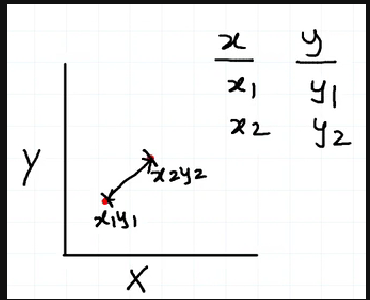

### So that I can find this distance in two-dimensional space.

####  Now, what's happening here?

     x2-x1 -> 1st Calculation

     Squaring -> 2nd Calculation

     Adding -> 3rd Calculation

     y2-y1 -> 4th Calculation

     Squaring -> 5th Calculation

     Applying Square Root -> 6th Calculation.


I have to make 6 calculations. Imagine if you have only one dimension, there's only one calculation. If we increase to two dimensions, my calculations jump from 1 to 6.

### Now, What if i add one more feature that is Z

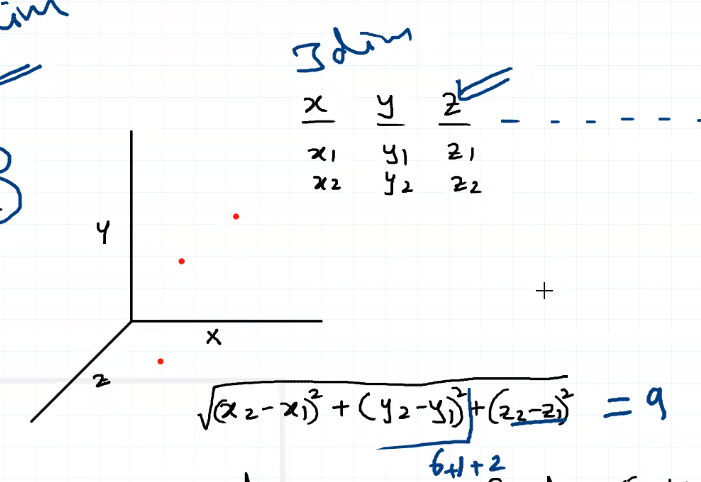

Now it is three-dimensional. So, this is how we can draw it. Humans cannot visualize more then three dimensions, which is why you see 3D movies, not 4D movies.



Now, let's examine the formula and check the number of calculations required. For two dimensions, we have six calculations, and now, for three dimensions, we have nine calculations. If we continue adding features, our dimensionality will increase, leading to more calculations. This process is known as the curse of dimensionality. It means that as dimensions increase, calculations become more time-consuming, and we may not know if all features are important. To address this issue, we use Principal Component Analysis (PCA), a dimension reduction technique that helps reduce the dimensionality.

#### Lets consider we have 4000 dimensions, So, we are going to reduce the 4000 dimensions.
    - We are going to reduce them to some numbers; 
    - how many numbers we will discuss. 
    - How can we identify which one is the best dimension? We will discuss that. 
So, that's Why we are going to use PCA !!

Que- So, Now lets Discuss How its work behind the score .

So First what PCA Does .

1- Data Transformation 

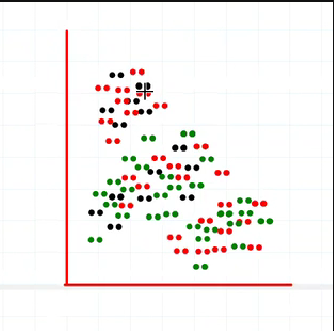


You know what I am going to do? I am going to plot XYZ data. I am just plotting it in 2D only to better understand it.

First and foremost, PCA handles data transformation. So, whenever you apply PCA, it is assumed that the mean data for all dimensions should be zero. Then, you can apply PCA.

Calculate the distance and take the average; it should be zero, μ=0.

If I take the average, let's say 2.8, then we can plot on the graph. The falling is at zero coordinate somewhere else, but what PCA says is that the mean should be zero. So, in order to do that, we have to bring this μ number to the zero coordinate. What can I do in order to bring the zero coordinate? I have to do a parallel translation.


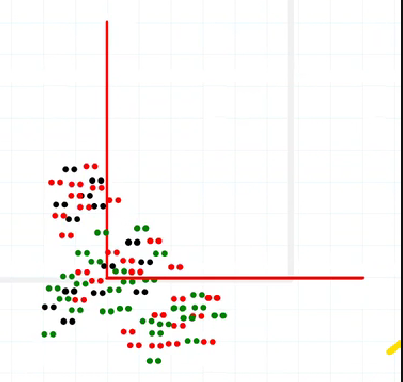

Que: So, what is parallel translation?

Ans: Parallel translation means shifting the entire space, moving it to the lower side, because we need to make this μ zero here. So, I shift all the data points to the zero coordinate.

What is this assumption?

Then, what does it do? Now, we have to convert our dimensions into principal components.

Que- So create this components How ?

Ans- Eighen value (Eighen Vectors) in automobile industry they used a lot so how we can interpret this vector and values .

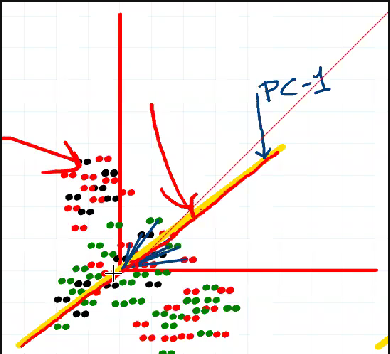

So, this is how it looks.


Now, I have three features (dimensions), and we have to create three components.


The first component is just like creating one column. Technically, we call it one component. So, this XYZ data converts into components PC1, PC2, and PC3.


From my data, I have PC1, PC2, and PC3.


So, what is going to happen is finding a straight line, the direction in which I can draw so that the residuals or errors are minimum. This direction is nothing but the eigenvector.


We need eigenvalues. These values are from zero to all the distances passing very close to the straight line. So, all these distances are going to your eigenvalue, which we call coefficients.


How does the eigenvector help here? It helps in finding the direction and, in that direction, identifying the values. These values are going to be your PC1 components.

Que: How do we get the second component?

Ans: After this, what is the second-best-fit line here, and which direction is best for the second-best-fit line, so the second component? Again, you have to find the distance. Those distances are what we call coefficients. Then you will find the second component value.


The left one is basically what? The left part is the third component because there is only one component left. Whatever data is left becomes part of the third component.


So, we have converted all XYZ data to PC1, PC2, PC3 (all three are eigenvalues).


Here, we need to understand that PC1 values' components are highly correlated. We figure this out with less residual, meaning that PC1 is carrying very good information. Like that, we have all the components.


What's the deal here? The deal is that if you have 4000 features, you will create that many components out of this 4000. How many components are actually important?


Let's say 4000. So, how do we identify the best number of components? That's where the concept called scree plot comes in. To plot a graph will help us understand how many components are best for your dataset. Based on the scree plot, we are going to use it. We will choose only that value.



So, this is the idea behind principal component analysis (PCA).

- Data Transformation
- Assumption
- Parallel Translation
- Finding Eigen Vectors on Max Linear Data
- Finding Eigenvalues (Coefficients)

In [ ]:
#Lets import PCA technique
from sklearn.decomposition import PCA

In [ ]:

pca=PCA()
pca.fit_transform(x_scaled)

In [ ]:
#Lets plot scree plot to check the best components.
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Principle Components')
plt.ylabel("Variance Covered")
plt.title('PCA')
plt.show()

In [ ]:
#Lets select how many Pricipal components we want
pca=PCA(n_components=13)
new_pump=pca.fit_transform(x_scaled)
princi_comp=pd.DataFrame(new_pump,
                        columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13'])

"M" for malignant (cancerous) or "B" for benign (non-cancerous).

    - "M" stands for "malignant." It means the growth could be cancerous, which is not good news.


    - "B" stands for "benign." This means the growth is not cancerous, which is a relief.




In [ ]:
#Replace label column (diagnosis) into binary codes.

data['diagnosis']=data['diagnosis'].replace({'M':1,'B':0})
y=data['diagnosis']

In [ ]:
#Data split into train test split
x_train,x_test,y_train,y_test=train_test_split(princi_comp,y,test_size=0.25,random_state=355)

In [2]:
#Lets create one function so, we can 
def print_score(clf,x_train,x_test,y_train,y_test,train=True):
    if train:
        y_pred=clf.predict(x_train)
        print("  =================Training Score==================  ")
        print("Accuracy Score ==> ",accuracy_score(y_train,y_pred))
    elif train== False:
        pred=clf.predict(x_test)
        print(" ====== Testing Score ======")
        print("Accuracy Score==> ",accuracy_score(y_test,pred))
        print("Classification Report ==> ",classification_report(y_test,pred))

In [ ]:
#Lets Build a Model.
from sklearn.svm import SVC
svc=SVC()

In [ ]:
#SVC model training and printing train and test score 

svc.fit(x_train,y_train)

In [ ]:
#Call the function and pass dataset to check train and test score .

print_score(svc,x_train,x_test,y_train,y_test,train=True)

print_score(svc,x_train,x_test,y_train,y_test,train=False)

In [3]:
#Similarly you can build other models and check the score .
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
gbdt=GradientBoostingClassifier()
rf=RandomForestClassifier()

In [ ]:
gbdt.fit(x_train,y_train)
rf.fit(x_train,y_train)
print("All Model is fit")

In [ ]:
#Call the function and pass dataset to check train and test score of Gradient Boosting Decision Tree.

print_score(gbdt,x_train,x_test,y_train,y_test,train=True)

print_score(gbdt,x_train,x_test,y_train,y_test,train=False)

In [ ]:
#Call the function and pass dataset to check train and test score of Random Forest .

print_score(rf,x_train,x_test,y_train,y_test,train=True)

print_score(rf,x_train,x_test,y_train,y_test,train=False)

# Hyperparameter Tuning

We, are going to tune the parameter with SVM

In [ ]:
#Lets import GridSearchCV
from sklearn.model_selection import GridSearchCV

# c

It is a hyperparameter in SVM to control error, determining how much error we can allow.

A small C allows a lesser number of errors, while a large C permits more errors.

# Gamma

Gamma determines how much curvature we want in a decision boundary. A high Gamma means more curvature, while a low Gamma means less curvature.

In [ ]:
#Lets set the parameter
param_grid={'C':[5,10,20],
           'gamma':[0.001,0.01,0.02,0.002]}


In [ ]:
gridsearch=GridSearchCV(svc,param_grid)

gridsearch.fit(x_train,y_train)



#Best Param
gridsearch.best_params_


In [ ]:
svc=SVC(C=5,gamma=0.01)
svc.fit(x_train,y_train)


#call the function and pass dataset to check train and test_score

print_score(svc,x_train,x_test,y_train,y_test,train=True)

print_score(svc,x_train,x_test,y_train,y_test,train=False)